In [1]:
## Import required Python modules
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy, scipy.stats
import io
import base64
#from IPython.core.display import display
from IPython.display import display, HTML, Image
from urllib.request import urlopen

try:
    import astropy as apy
    import astropy.table
    _apy = True
    #print('Loaded astropy')
except:
    _apy = False
    #print('Could not load astropy')

## Customising the font size of figures
plt.rcParams.update({'font.size': 14})

## Customising the look of the notebook
## This custom file is adapted from https://github.com/lmarti/jupyter_custom/blob/master/custom.include
HTML('custom.css')
#HTML(urlopen('https://raw.githubusercontent.com/bretonr/intro_data_science/master/custom.css').read().decode('utf-8'))

In [2]:
HTML('''
<script>
    function toggleCodeCells() {
      var codeCells = document.querySelectorAll('.jp-CodeCell');

      codeCells.forEach(function(cell) {
        var inputArea = cell.querySelector('.jp-InputArea');
        if (inputArea) {
          var currentDisplay = inputArea.style.display || getComputedStyle(inputArea).display;
          inputArea.style.display = currentDisplay === 'none' ? '' : 'none';
        }
      });
    }
</script>

<!-- Add a button to toggle visibility of input code cells -->
<button onclick="toggleCodeCells()">Toggle Code Cells</button>
''')

In [3]:
HTML('''
<button id="toggleButton" onclick="toggleQueue()">Toggle Queue</button>

<script>
  var queueHidden = false;

  function toggleQueue() {
    var queueElements = document.querySelectorAll('div.queue');

    for (var i = 0; i < queueElements.length; i++) {
      if (queueHidden) {
        queueElements[i].style.display = 'block';
      } else {
        queueElements[i].style.display = 'none';
      }
    }

    queueHidden = !queueHidden;
  }
</script>
''')

<div class="container-fluid">
    <div class="row">
        <div class="col-md-8" align="center">
            <h1>PHYS 10791: Introduction to Data Science</h1>
            <!--<h3>2019-2020 Academic Year</h3><br>-->
        </div>
        <div class="col-md-3">
            <img align='center' style="border-width:0" src="images/UoM_logo.png"/>
        </div>
    </div>
</div>

<div class="container-fluid">
    <div class="row">
        <div class="col-md-2" align="right">
            <b>Course instructors:&nbsp;&nbsp;</b>
        </div>
        <div class="col-md-9" align="left">
            <a href="http://www.renebreton.org">Prof. Rene Breton</a> - Twitter <a href="https://twitter.com/BretonRene">@BretonRene</a><br>
            <a href="http://www.hep.manchester.ac.uk/u/gersabec">Dr. Marco Gersabeck</a> - Twitter <a href="https://twitter.com/MarcoGersabeck">@MarcoGersabeck</a>
        </div>
    </div>
</div>

<div class="queue">
    Lecture 3 - 00:00
</div>

## 2.1 Probabilities and random variables

### 2.1.1 Axioms of probability

Repeated measurements => degree of randomness => probability

Definitions:
- $\cap$: _intersection_, **'AND'**
- $\cup$: _union_, **'OR'**
- $\subset$: _subset_, set within bigger set
- $\emptyset$: empty _subset_
- $\bar A$: **'NOT'** the subset
- $\mid$: **given**, i.e. conditional to

Probability following Kolmogorov (1933). Let us define set $\Omega = \{E_1, E_2, \dots \}$.

For subset $A$ of $\Omega$ such that $A \subset \Omega$: $P(A)$ is called probability and satisfies the three *axioms of probability*:

1. For subset $A$ such that $A \subset \Omega$, $P(A) \geq 0$
2. For disjoint subsets $A$ and $B$ (i.e. $A \cap B = \emptyset$), $P(A \cup B) = P(A) + P(B)$
3. $P(\Omega) = 1$

The following properties can be derived from these axioms:

- $P(\bar A) = 1 - P(A)$, where $\bar A$ is complement subset (**NOT**)
- $P(A \cup \bar A) = 1$
- $0 \leq P(A) \leq 1$
- $P(\emptyset) = 0$
- If $A \subset B$ then $P(A) \leq P(B)$
- $P(A \cup B) = P(A) + P(B) - P(A \cap B)$

<div class="queue">
    Lecture 3 - 00:10
</div>

<div class="example">Example 1</div>

_Euler diagram_, illustrates a probability space.

<img src="images/1024px-Conditional_probability.svg.png" width="40%">

- $P(A) = 0.3 + 0.1 + 0.12 = 0.52$
- $P(B_2) = 0.12 + 0.04 = 0.16$
- $P(\bar A) = 0.34 + 0.1 + 0.04 = 0.48 = 1 - 0.52$
- $P(A \cup B_2) = P(A) + P(B) - P(A \cap B_2) = 0.52 + 0.16 - 0.12 = 0.56$

<div class="queue">
    Lecture 3 - 00:15 - Problem Sheet 2, Problem 1 (Rene's household universe)
</div>

<div class="queue">
    Lecture 3 - 00:20
</div>

### 2.2.2 Bayes theorem

#### Conditional probability
Conditional probability of $A$ given $B$ is:

\begin{equation}
  P(A \mid B) = \frac{P(A \cap B)}{P(B)}
\end{equation}

<div class="example">Example 1</div>

From Euler diagram:

- $P(A \mid B_1) = \frac{0.1}{0.1} = 1$
- $P(A \mid B_2) = \frac{0.12}{0.16} = 0.75$
- $P(A \mid B_3) = \frac{0}{0.1} = 0$.
- $P(A \mid B) = \frac{0.1 + 0.12}{0.1 + 0.12 + 0.04 + 0.1} = 0.61$

#### Derivation of Bayes theorem

Conditional probability of B given A:

\begin{equation}
  P(B \mid A) = \frac{P(B \cap A)}{P(A)}
\end{equation}

However, $P(A \cap B) = P(B \cap A)$. Combine the two conditional probabilities:

\begin{eqnarray}
  P(A \mid B) &=& \frac{P(A) P(B \mid A)}{P(B)} \\
         &=& \frac{P(A) P(B \mid A)}{\sum_i P(B \mid A_i) P(A_i)}
\end{eqnarray}

Second form if $B$ is made of multiple subsets.

**Bayes rule**. Often:

- $P: P(A \mid B)$, posterior
- $I: P(A)$, prior
- $\mathcal{L}: P(B \mid A)$, likelihood
- $E: P(B)$, evidence

Therefore:

\begin{equation}
  P = \frac{I \mathcal{L}}{E}
\end{equation}

<div class="queue">
    Lecture 3 - 00:25
</div>

### Case study: The mesmerising effect of Bayes' theorem

Consider for the case of a certain type of cancer, which causes a specific set of symptoms to manifest in all individuals suffering from it. If an individual displays these symptoms, does it mean that they suffer from the said cancer?

One of the surprising consequences of using Bayes' theorem to correctly perform statistical inference is that in certain situations it sometimes goes against our first intuition. More often than not, this is due to not correctly accounting for the prior probability (or not including it at all).

The answer to the above question is that it is not 100% certain that the person has cancer. In fact, the probability can be suprisingly low. Why? We must consider the prevalence of thes symptom in the general population. It could be that other conditions also cause the same symptoms or, even, that some healthy individuals display it somehow.

To answer such kind of problem is often easier with a table of outcomes. Let us imagine that 1 in 20,000 people suffer from this cancer and that the symptoms are seen in 100% of patients with this particular cancer. Let us add, however, that of the remaining 19,999, 2 also exhibit the particular symptom. Therefore:

|       | C Yes | C No   | Total |
|-------|-------|--------|-------|
| S Yes | 1     | 2      | 3     |
| S No  | 0     | 19997  | 19997 |
| Total | 1     | 19999  | 20000 |

Recasted in a mathematical way, the question is $P({\rm cancer} | {\rm symptom})$. We can readily see that the answer is $1/3$, or 33%.

The full Bayesian calculation is:
\begin{eqnarray}
  P({\rm cancer} \mid {\rm symptom}) &=& \frac{P({\rm cancer}) P({\rm symptom} \mid {\rm cancer})}{P({\rm symptom})} \\
                                     &=& \frac{P({\rm cancer}) P({\rm symptom} \mid {\rm cancer})}{P({\rm cancer}) P({\rm symptom} \mid {\rm cancer}) + P({\rm no cancer}) P({\rm symptom} \mid {\rm no cancer})} \\
                                     &=& \frac{1/20000 \cdot 1}{1/20000 \cdot 1 + 19999/20000 \cdot 2/19999} \\
                                     &=& 0.333
\end{eqnarray}

We therefore recover the 33%.

<div class="queue">
    Lecture 3 - 00:30 - Problem Sheet 2, Problem 2 (Screening test)
</div>

<div class="queue">
    Lecture 3 - 00:40
</div>

## 2.3 Probability distributions

### 2.3.1 General probability distributions

#### Discrete probability distribution

Observable $x \in \Omega$ can only take discrete values. **Probability mass function** (PMF) is probability of $x$:

\begin{equation}
  f(x) \,.
\end{equation}

As per axiom 3:
\begin{equation}
  \sum_{x \, \in \, \Omega} f(x) = 1 \,.
\end{equation}

*Ex: Odds of rolling 6 on dice.*

#### Continuous probability distribution

Observable $x \in \Omega$ can take continuous values. **Probability density function** (PDF) is probability of $x$ in interval $[x,x+dx]$:

\begin{equation}
  f(x) dx \,.
\end{equation}

As per axiom 3:

\begin{equation}
  \int_\Omega f(x) dx = 1
\end{equation}

*Ex: Odds of Manchester United winning Manchester derby against Manchester City.*

<div class="queue">
    Lecture 4 - 00:00
</div>

### 2.3.2 Some important probability distributions

#### Binomial distribution

Process with identical trials with two outcomes.

Ex:

- Coin (head/tail)
- Quality control (pass/fail)
- Treatement in medecine (cure/no cure)

Define:

- $k$ number of successes
- $n$ number of trials
- $p$ probability of an individual success

##### PMF

\begin{equation}
  P(k;, n, p) = p^k (1-p)^{(n-k)} \frac{n!}{k!(n-k)!}
\end{equation}

##### Properties

Mean: $np$

Variance: $np(1-p)$

<div class="example">Example 1</div>

Toss coin four times. Possible outcomes?

| Outcome | Degeneracy | Probability |
| :-----: | :--------: | :---------: |
| HHHH    | 1          | 1/16        |
| HHHT    | 4          | 1/4         |
| HHTT    | 6          | 3/8         |
| HTTT    | 4          | 1/4         |
| TTTT    | 1          | 1/16        |

What is the probability of having one head out of four fair coin toss?

_The answer is $1/4$. Using the PMF:_

\begin{equation}
  P(1; 4, 0.5) = 0.5^1 (1-0.5)^{4-1} \frac{4!}{1! (4-1)!} = 0.25
\end{equation}

<div class="example">Example 2</div>

What is the probability of having no more than one head out of four fair coin toss?

\begin{equation}
  P(k \le 1; n=4, p=0.5) = P(k=0) + P(k=1) = 1/16 + 1/4 = 0.3125
\end{equation}

**Plotting the binomial distribution**

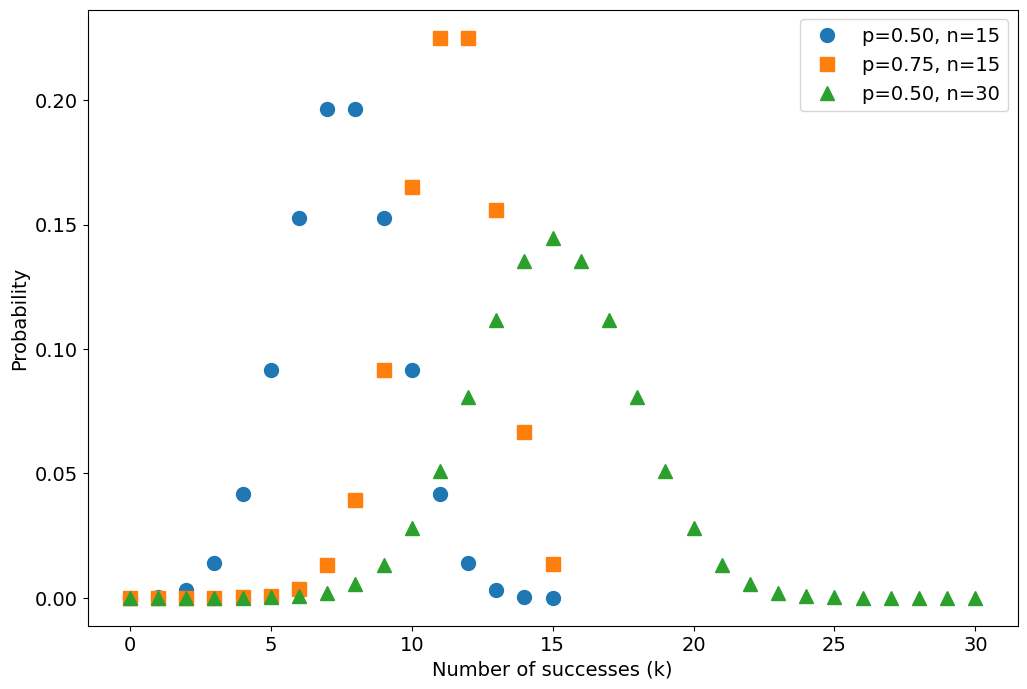

In [4]:
## Generating the subplots
fig, ax = plt.subplots(1, 1, figsize=(12,8))

## Generating the PMF for three cases. Note that we use implicit array operations instead of looping through k values.
n1 = 15
k1 = np.arange(n1+1)
p1 = 0.5
prob1 = scipy.stats.binom.pmf(k1, n1, p1)

n2 = 15
k2 = np.arange(n2+1)
p2 = 0.75
prob2 = scipy.stats.binom.pmf(k2, n2, p2)

n3 = 30
k3 = np.arange(n3+1)
p3 = 0.5
prob3 = scipy.stats.binom.pmf(k3, n3, p3)

## Plotting
_ = ax.plot(k1, prob1, '.', ms=20, label='p=0.50, n=15')
_ = ax.plot(k2, prob2, 's', ms=10, label='p=0.75, n=15')
_ = ax.plot(k3, prob3, '^', ms=10, label='p=0.50, n=30')
_ = ax.set_xlabel('Number of successes (k)')
_ = ax.set_ylabel('Probability')
_ = ax.legend()

## We save the figure
#fig.savefig('./images/binomial_pmf.pdf')

<div class="queue">
    Lecture 4 - 00:10 - Problem Sheet 2, Problem 3 (Tossing fair coin)
</div>

<div class="queue">
    Lecture 4 - 00:15
</div>

#### Poisson distribution

Process with number of events occurring in a given interval, with average occurance rate known and events independent.

Ex:

- Letters at home per day
- Phone calls at call centre between 9 and 10 am
- Number of X-ray photons received from binary system in a 1-min window

Define:

- $k$ number of events in interval
- $\lambda$ average event rate per interval

##### PMF

\begin{equation}
  P(k; \lambda) = e^{-\lambda} \frac{\lambda^k}{k!}
\end{equation}

##### Properties

Mean: $\lambda$

Variance: $\lambda$

<div class="example">Example 1</div>

In 1898, Russian economist Ladislaus Bortkiewicz published a book on statistics that included a study which has now become a classic example of Poisson statistics. The study looked into the number of annual deaths of soliders in the Prussian army by horse kicks from 1875 to 1894. In 14 different army cavalry corps, over this 20 years period, there were 196 deaths.

| Year | GC  | C1  | C2  | C3  | C4  | C5  | C6  | C7  | C8  | C9  | C10 | C11 | C14 | C15 |
| :--: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 1875 | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 0   | 0   | 1   | 0   |
| 1876 | 2   | 0   | 0   | 0   | 1   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 1   |
| 1877 | 2   | 0   | 0   | 0   | 0   | 0   | 1   | 1   | 0   | 0   | 1   | 0   | 2   | 0   |
| 1878 | 1   | 2   | 2   | 1   | 1   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 1   | 0   |
| 1879 | 0   | 0   | 0   | 1   | 1   | 2   | 2   | 0   | 1   | 0   | 0   | 2   | 1   | 0   |
| 1880 | 0   | 3   | 2   | 1   | 1   | 1   | 0   | 0   | 0   | 2   | 1   | 4   | 3   | 0   |
| 1881 | 1   | 0   | 0   | 2   | 1   | 0   | 0   | 1   | 0   | 1   | 0   | 0   | 0   | 0   |
| 1882 | 1   | 2   | 0   | 0   | 0   | 0   | 1   | 0   | 1   | 1   | 2   | 1   | 4   | 1   |
| 1883 | 0   | 0   | 1   | 2   | 0   | 1   | 2   | 1   | 0   | 1   | 0   | 3   | 0   | 0   |
| 1884 | 3   | 0   | 1   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 2   | 0   | 1   | 1   |
| 1885 | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 0   | 2   | 0   | 1   | 0   | 1   |
| 1886 | 2   | 1   | 0   | 0   | 1   | 1   | 1   | 0   | 0   | 1   | 0   | 1   | 3   | 0   |
| 1887 | 1   | 1   | 2   | 1   | 0   | 0   | 3   | 2   | 1   | 1   | 0   | 1   | 2   | 0   |
| 1888 | 0   | 1   | 1   | 0   | 0   | 1   | 1   | 0   | 0   | 0   | 0   | 1   | 1   | 0   |
| 1889 | 0   | 0   | 1   | 1   | 0   | 1   | 1   | 0   | 0   | 1   | 2   | 2   | 0   | 2   |
| 1890 | 1   | 2   | 0   | 2   | 0   | 1   | 1   | 2   | 0   | 2   | 1   | 1   | 2   | 2   |
| 1891 | 0   | 0   | 0   | 1   | 1   | 1   | 0   | 1   | 1   | 0   | 3   | 3   | 1   | 0   |
| 1892 | 1   | 3   | 2   | 0   | 1   | 1   | 3   | 0   | 1   | 1   | 0   | 1   | 1   | 0   |
| 1893 | 0   | 1   | 0   | 0   | 0   | 1   | 0   | 2   | 0   | 0   | 1   | 3   | 0   | 0   |
| 1894 | 1   | 0   | 0   | 0   | 0   | 0   | 0   | 0   | 1   | 0   | 1   | 1   | 0   | 0   |

| number of deaths | number of occurrences |
| :--------------: | :-------------------: |
| 0                | 144                   |
| 1                | 91                    |
| 2                | 32                    |
| 3                | 11                    |
| 4                | 2                     |
| 5                | 0                     |
| 6                | 0                     |

Can these data be described by Poisson?

Death rate per corps per year is: $\lambda = 196\, {\rm deaths}/(14\, {\rm corps}*20\, {\rm years}) = 196/280 = 0.7$.

Probability of no deaths in a corps in a year is:

\begin{equation}
    P(k=0; \lambda=0.7) = e^{-0.7} \frac{0.7^0}{0!} = 0.4966
\end{equation}

How does it compare to the real data? 144 entries out of 280 with no recorded deaths, so $144/280 = 0.5142$.

**Plotting the Poisson distribution**

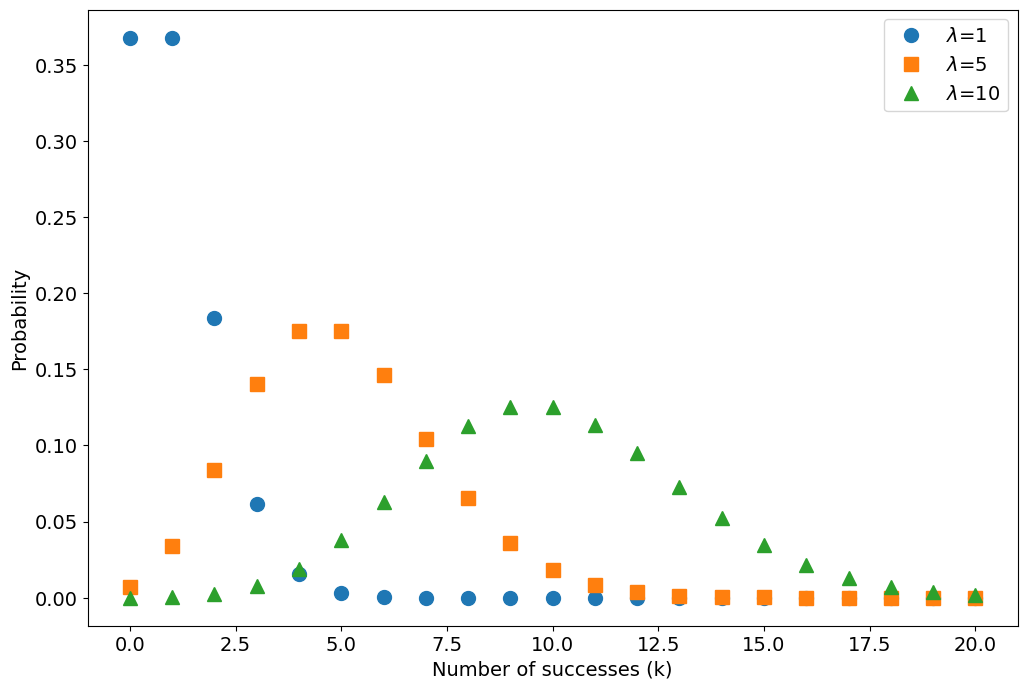

In [5]:
## Generating the subplots
fig, ax = plt.subplots(1, 1, figsize=(12,8))

## Generating the PMF for three cases. Note that we use implicit array operations instead of looping through k values.
n1 = 20
k1 = np.arange(n1+1)
rate1 = 1
prob1 = scipy.stats.poisson.pmf(k1, rate1)

n2 = 20
k2 = np.arange(n2+1)
rate2 = 5
prob2 = scipy.stats.poisson.pmf(k2, rate2)

n3 = 20
k3 = np.arange(n3+1)
rate3 = 10
prob3 = scipy.stats.poisson.pmf(k3, rate3)

## Plotting
_ = ax.plot(k1, prob1, '.', ms=20, label='$\lambda$=1')
_ = ax.plot(k2, prob2, 's', ms=10, label='$\lambda$=5')
_ = ax.plot(k3, prob3, '^', ms=10, label='$\lambda$=10')
_ = ax.set_xlabel('Number of successes (k)')
_ = ax.set_ylabel('Probability')
_ = ax.legend()

## We save the figure
#fig.savefig('./images/poisson_pmf.pdf')

<div class="queue">
    Lecture 4 - 00:25 - Problem Sheet 2, Problem 4 (Hurricane Harvey)
</div>

<div class="queue">
    Lecture 4 - 00:30
</div>

#### Gaussian distribution

Also known as *normal distribution*. Process of continuous events, where we know the mean and standard deviation.

Ex:

- The mass of a bag of flour bought at the grocery store
- The distribution of heights of students in a core physics lecture course
- The gravitational constant derived from a pendulum experiment by the 1st year physics students

Define:
    
- $\mu$: mean
- $\sigma$: standard distribution

##### PDF
\begin{equation}
  P(x; \mu, \sigma) \sim \mathcal{N}(\mu, \sigma^2) = \frac{1}{\sigma \sqrt{2\pi}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}
\end{equation}

##### Properties

Mean, median, mode: $\mu$

Variance: $\sigma^2$

<div class="example">Example 1</div>

Antropomorphic statistics for the UK report an average adult female height of 161.9 cm with a standard deviation of 6.5 cm. Assuming that these data follow a Gaussian distribution, how likely is it that an adult female would be taller 174.9 cm?
<img src="images/1920px-Standard_deviation_diagram.svg.png" width="50%">
(Source: <a href="https://commons.wikimedia.org/wiki/User:Mwtoews">M. W. Toews</a>, <a href="https://commons.wikimedia.org/wiki/File:Standard_deviation_diagram.svg">Standard deviation diagram</a>, <a href="https://creativecommons.org/licenses/by/2.5/legalcode">CC BY 2.5</a>)

The question is therefore $P({\rm height} > 174.9 ; \mu = 161.9, \sigma = 6.5)$.

Note that $174.9 - 161.9 = 13$, which is exactly $2 \times 6.5 = 2 \sigma$. Therefore, the probability is the area in the upper tail above $2\sigma$. This is $2.1 + 0.1 = 2.2\%$.

_**Note**: any Physics student should know the area under the curve for the key 1, 2 and 3 $\sigma$ intervals of the Gaussian distribution. Alternatively, it may be easier to remember that the area between $\pm 1$, $\pm 2$ and $\pm 3 \sigma$ are respectively $68.26$, $95.44$ and $99.72\%$._

**Plotting the Gaussian distribution**

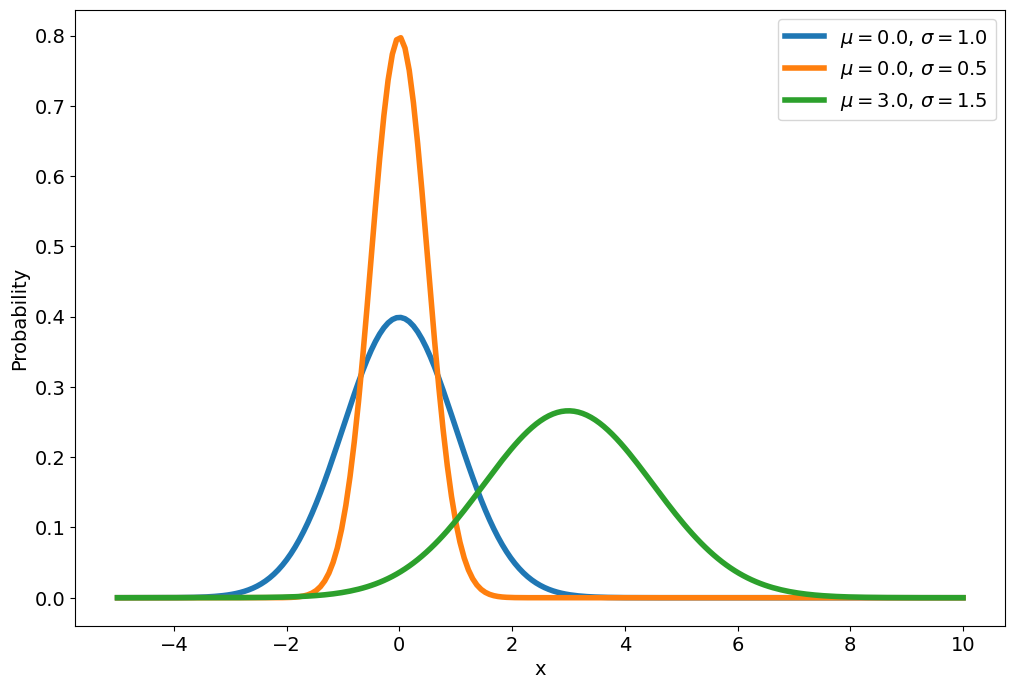

In [6]:
## Generating the subplots
fig, ax = plt.subplots(1, 1, figsize=(12,8))

## Generating the PMF for three cases. Note that we use implicit array operations instead of looping through k values.
mu1 = 0.
sigma1 = 1.
x1 = np.linspace(-5,10,201)
prob1 = scipy.stats.norm.pdf(x1, loc=mu1, scale=sigma1)

mu2 = 0.
sigma2 = 0.5
x2 = np.linspace(-5,10,201)
prob2 = scipy.stats.norm.pdf(x2, loc=mu2, scale=sigma2)

mu3 = 3.
sigma3 = 1.5
x3 = np.linspace(-5,10,201)
prob3 = scipy.stats.norm.pdf(x3, loc=mu3, scale=sigma3)

## Plotting
_ = ax.plot(x1, prob1, '-', lw=4, label='$\mu=0.0$, $\sigma=1.0$')
_ = ax.plot(x2, prob2, '-', lw=4, label='$\mu=0.0$, $\sigma=0.5$')
_ = ax.plot(x3, prob3, '-', lw=4, label='$\mu=3.0$, $\sigma=1.5$')
_ = ax.set_xlabel('x')
_ = ax.set_ylabel('Probability')
_ = ax.legend()

## We save the figure
#fig.savefig('./images/gaussian_pdf.pdf')

<div class="queue">
    Lecture 4 - 00:40 - Problem Sheet 2, Problem 5 (Hurricane Harvey)
</div>

<div class="queue">
    Lecture 4 - 00:45
</div>

### 2.3.3 Gaussian distribution as a limit of Binomial and Poisson distributions

Poisson is extension of binomial where unknown number of trials and events go from discrete to continuous, but with a discrete number of successes. Ex: rolling a dice (discrete events) vs lightning flashes (time continuum).

Both Binomial and Poisson distribution turn into Gaussian distributions in the limit where $n$ and $\lambda$ are infinity.

<img src="images/stats triad.png" width="40%">

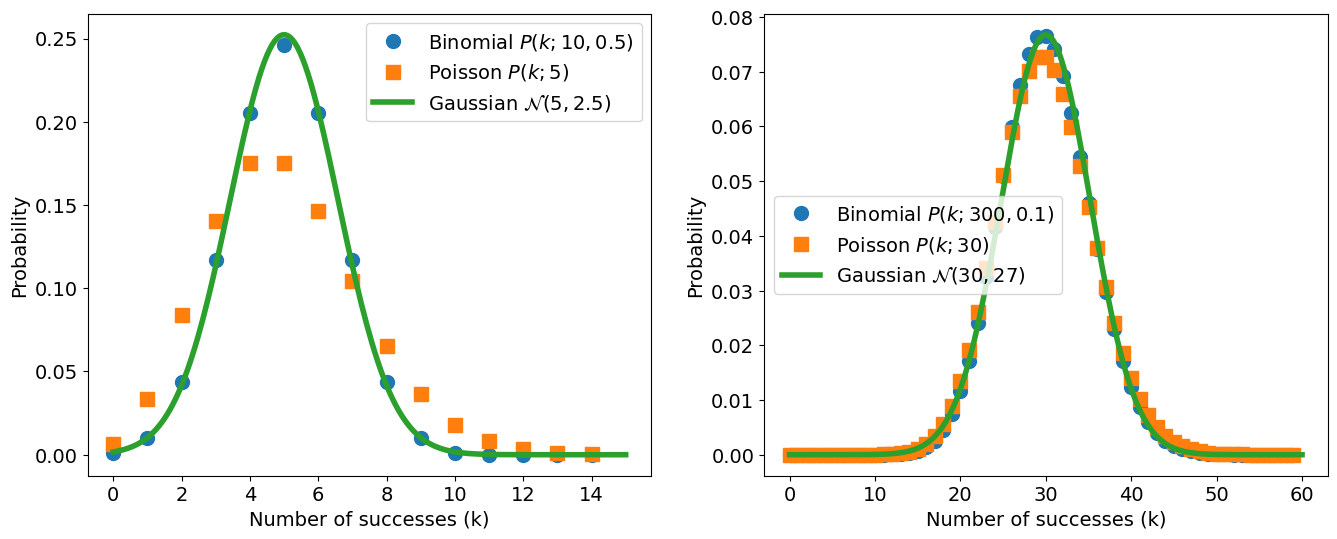

In [7]:
## Generating the subplots
fig, ax = plt.subplots(1, 2, figsize=(16,6))

## Generating the PMF for three cases (binomial, Poisson and Gaussian).
n1 = 10
p1 = 0.5
k1 = np.arange(n1*p1*3)
binom1 = scipy.stats.binom.pmf(k1, n1, p1)

rate1 = n1*p1
poisson1 = scipy.stats.poisson.pmf(k1, rate1)

mu1 = n1*p1
sigma1 = np.sqrt(n1*p1*(1-p1))
x1 = np.linspace(0,n1*p1*3,201)
gauss1 = scipy.stats.norm.pdf(x1, loc=mu1, scale=sigma1)

## Plotting
_ = ax[0].plot(k1, binom1, '.', ms=20, label='Binomial $P(k;10,0.5)$')
_ = ax[0].plot(k1, poisson1, 's', ms=10, label='Poisson $P(k;5)$')
_ = ax[0].plot(x1, gauss1, '-', lw=4, label='Gaussian $\mathcal{N}(5,2.5)$')
_ = ax[0].set_xlabel('Number of successes (k)')
_ = ax[0].set_ylabel('Probability')
_ = ax[0].legend()

## Generating the PMF for three cases (binomial, Poisson and Gaussian).
n2 = 300
p2 = 0.1
k2 = np.arange(n2*p2*2)
binom2 = scipy.stats.binom.pmf(k2, n2, p2)

rate2 = n2*p2
poisson2 = scipy.stats.poisson.pmf(k2, rate2)

mu2 = n2*p2
sigma2 = np.sqrt(n2*p2*(1-p2))
x2 = np.linspace(0,n2*p2*2,201)
gauss2 = scipy.stats.norm.pdf(x2, loc=mu2, scale=sigma2)

## Plotting
_ = ax[1].plot(k2, binom2, '.', ms=20, label='Binomial $P(k;300,0.1)$')
_ = ax[1].plot(k2, poisson2, 's', ms=10, label='Poisson $P(k;30)$')
_ = ax[1].plot(x2, gauss2, '-', lw=4, label='Gaussian $\mathcal{N}(30,27)$')
_ = ax[1].set_xlabel('Number of successes (k)')
_ = ax[1].set_ylabel('Probability')
_ = ax[1].legend()

## We save the figure
#fig.savefig('./images/gaussian_limit.pdf')

<div class="well" align="center">
    <div class="container-fluid">
        <div class="row">
            <div class="col-md-3" align="center">
                <img align="center" alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" width="60%">
            </div>
            <div class="col-md-8">
            This work is licensed under a <a href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>).
            </div>
        </div>
    </div>
    <br>
    <br>
    <i>Note: The content of this Jupyter Notebook is provided for educational purposes only.</i>
</div>